In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = 'colab'
%matplotlib inline

# Loading the dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv")
dfc=df.copy()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


# changing the titles

In [ ]:
df.columns = df.columns.str.title()
df.rename(columns={'Bmi': 'BMI', 'Sex': 'Gender'}, inplace=True)
df.columns

Index(['Id', 'Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'BMI',
       'Smoking_Status', 'Stroke'],
      dtype='object')

In [ ]:
dfc.columns = dfc.columns.str.title()
dfc.rename(columns={'Bmi': 'BMI', 'Sex': 'Gender'}, inplace=True)
dfc.columns

Index(['Id', 'Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'BMI',
       'Smoking_Status', 'Stroke'],
      dtype='object')

In [ ]:
df.drop(df[df['Gender'] == 'Other'].index)
dfc.drop(dfc[dfc['Gender'] == 'Other'].index)



,Id,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


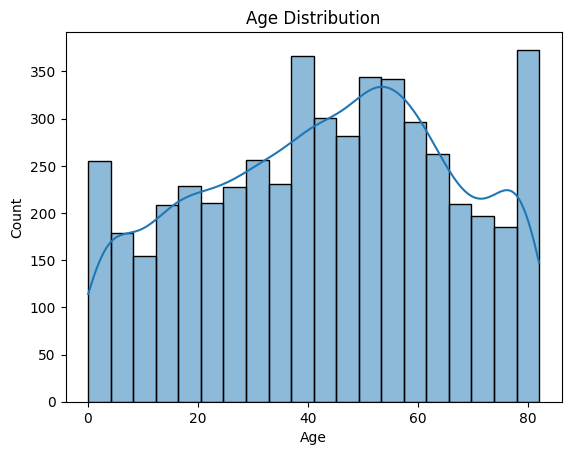

In [ ]:
sns.histplot(dfc['Age'],kde=True)
plt.title('Age Distribution')
plt.show()

In [ ]:
# Define age categories and their corresponding ranges
def categorize_age(age):
    if age >= 0 and age <= 1:
        return 'New Born'
    elif age >1 and age <= 3:
        return 'Toddler'
    elif age >3 and age <= 6:
        return 'Preschooler'
    elif age > 6 and age <= 12:
        return 'School Age'
    elif age > 12 and age < 20:
        return 'Teenager'
    elif age >= 20 and age <= 24:
        return 'Adolescense'
    elif age > 24 and age <= 39:
        return 'Adult'
    elif age > 39 and age <= 59:
        return 'Middle Aged'
    else:
        return 'Senior'
# Apply the function to the 'Age' column and create a new 'AgeCategory' column
dfc['AgeCategory'] = dfc['Age'].apply(categorize_age)

# Display the updated DataFrame with the new 'AgeCategory' column
dfc.head()


,Id,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,AgeCategory
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Middle Aged
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


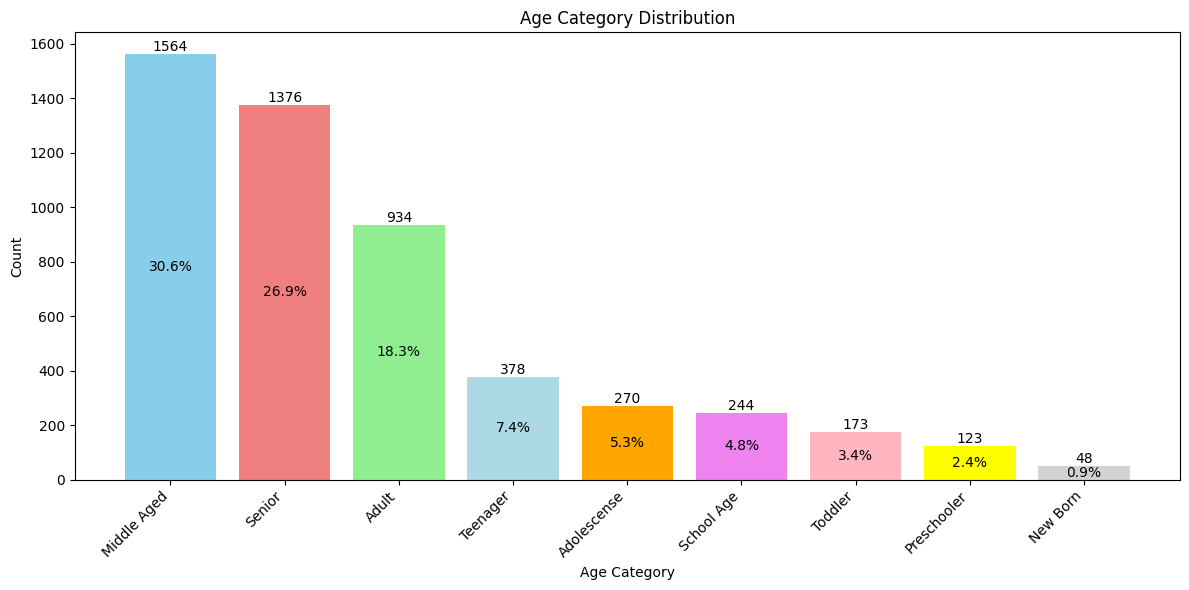

In [ ]:
# Calculate value counts and percentages for each age category
age_category_counts = dfc['AgeCategory'].value_counts()
age_category_percentages = (age_category_counts / len(dfc)) * 100

# Create a bar plot with customizations
plt.figure(figsize=(12, 6))
bars = plt.bar(age_category_counts.index, age_category_counts.values, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue', 'orange', 'violet', 'lightpink','yellow','lightgray'])

# Add percentage labels inside each bar
for bar, percentage in zip(bars, age_category_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=10)

# Add value counts on top of each bar
for bar, count in zip(bars, age_category_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Age Category Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
def categorize_BMI(bmi):
    if bmi  < 18.5:
        return 'Underweight'
    elif 18.5<= bmi <= 24.9:
        return 'Normal Weight'
    elif 24.9< bmi <= 29.9:
        return 'Overweight'
    elif 29.9< bmi <= 34.9:
        return 'Moderately Obese'
    elif 34.9< bmi <= 40:
        return 'Severely Obese'
    else:
        return 'Extreme Obese'
dfc['BMI_Group'] = dfc['BMI'].apply(categorize_BMI)

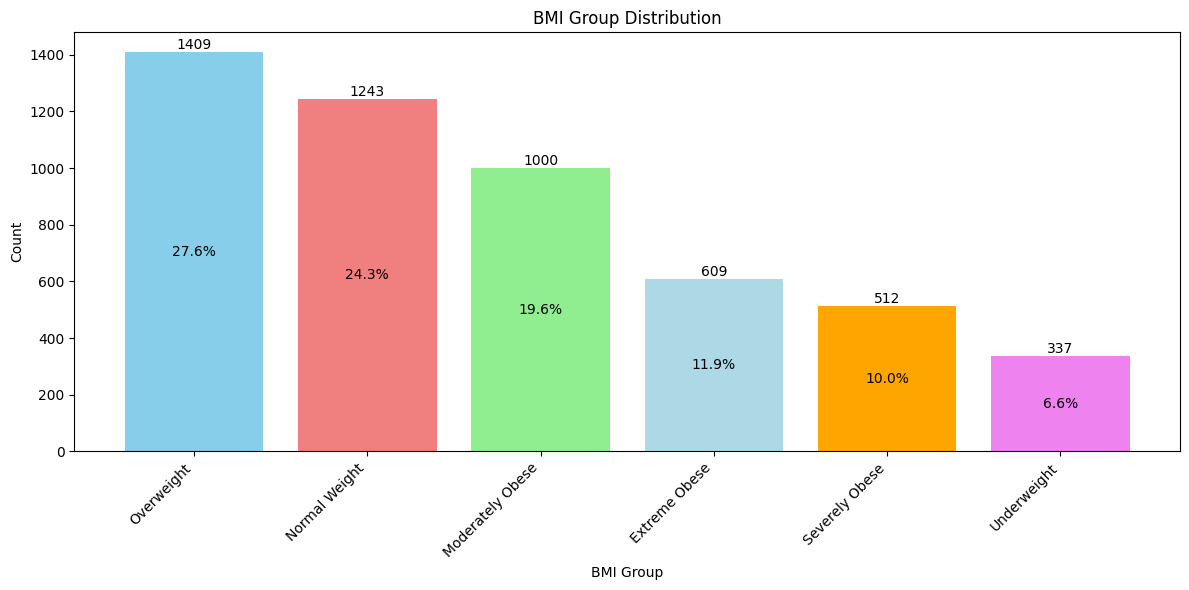

In [ ]:
# Calculate value counts and percentages for each BMI group
bmi_group_counts = dfc['BMI_Group'].value_counts()
bmi_group_percentages = (bmi_group_counts / len(dfc)) * 100

# Create a bar plot with customizations
plt.figure(figsize=(12, 6))
bars = plt.bar(bmi_group_counts.index, bmi_group_counts.values, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue', 'orange', 'violet'])

# Add percentage labels inside each bar
for bar, percentage in zip(bars, bmi_group_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=10)

# Add value counts on top of each bar
for bar, count in zip(bars, bmi_group_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('BMI Group')
plt.ylabel('Count')
plt.title('BMI Group Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


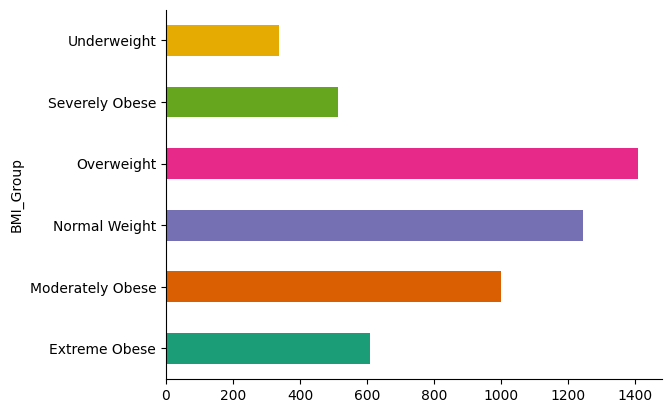

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
dfc.groupby('BMI_Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
bmi_counts = (dfc['BMI'] > 45).value_counts()
print(bmi_counts)

BMI
False    4955
True      155
Name: count, dtype: int64


In [ ]:
Q1 = dfc['BMI'].quantile(0.25)
Q3 = dfc['BMI'].quantile(0.75)
IQR = Q3 - Q1

x = Q1 - 3 * IQR
y = Q3 + 3 * IQR

outliers = dfc[(dfc['BMI'] < x) | (dfc['BMI'] > y)]
outliers

,Id,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,AgeCategory,BMI_Group
358,66333,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0,Middle Aged,Extreme Obese
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0,Middle Aged,Extreme Obese
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0,Adolescense,Extreme Obese
1559,37759,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0,Middle Aged,Extreme Obese
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0,Teenager,Extreme Obese
2764,20292,Female,24.0,0,0,Yes,Private,Urban,85.55,63.3,never smoked,0,Adolescense,Extreme Obese
4188,70670,Female,27.0,0,0,Yes,Private,Rural,57.96,64.4,never smoked,0,Adult,Extreme Obese
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0,Adult,Extreme Obese


<ipython-input-17-08a3c8ad3e80>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-17-08a3c8ad3e80>:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-17-08a3c8ad3e80>:15: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



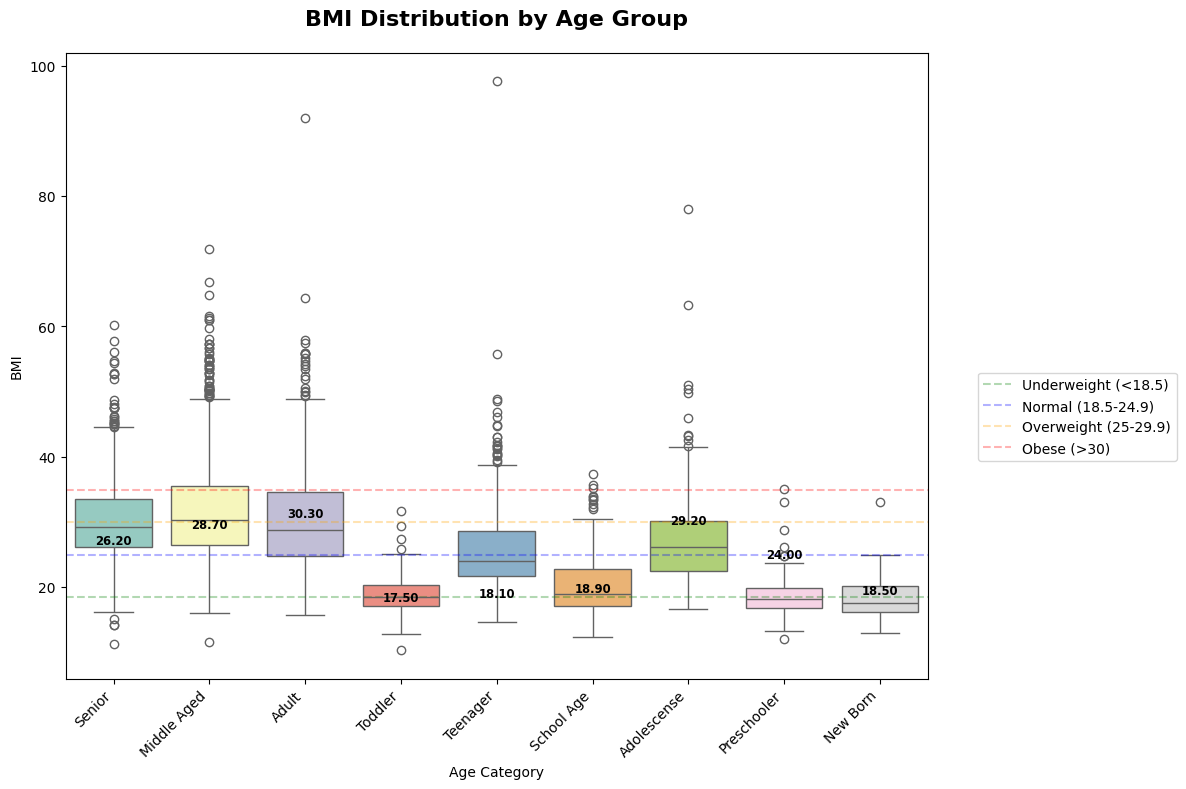

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='AgeCategory', y='BMI', data=dfc, palette="Set3",legend=False)
plt.title('BMI Distribution by Age Group',pad=20, fontsize=16,fontweight='bold')
plt.xlabel('Age Category')
plt.ylabel('BMI')

plt.xticks(rotation=45, ha='right')
# Calculate and display the median for each group
medians = dfc.groupby(['AgeCategory'])['BMI'].median()

vertical_offset = dfc['BMI'].std() * 0.05  # Adjust the vertical offset as needed

for xtick in range(len(medians)):
    plt.text(xtick, medians[xtick] + vertical_offset,
             f'{medians[xtick]:.2f}',
             horizontalalignment='center', size='small', color='black', weight='semibold')

plt.axhline(y=18.5, color='green', linestyle='--', alpha=0.3, label='Underweight (<18.5)')
plt.axhline(y=24.9, color='blue', linestyle='--', alpha=0.3, label='Normal (18.5-24.9)')
plt.axhline(y=29.9, color='orange', linestyle='--', alpha=0.3, label='Overweight (25-29.9)')
plt.axhline(y=34.9, color='red', linestyle='--', alpha=0.3, label='Obese (>30)')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
bins = [0, 70, 140, 200, dfc['Avg_Glucose_Level'].max()]
labels = ['Low', 'Normal', 'High', 'Very High']
dfc['Glucose_Level_Group'] = pd.cut(dfc['Avg_Glucose_Level'], bins=bins, labels=labels)
group_counts = dfc['Glucose_Level_Group'].value_counts()

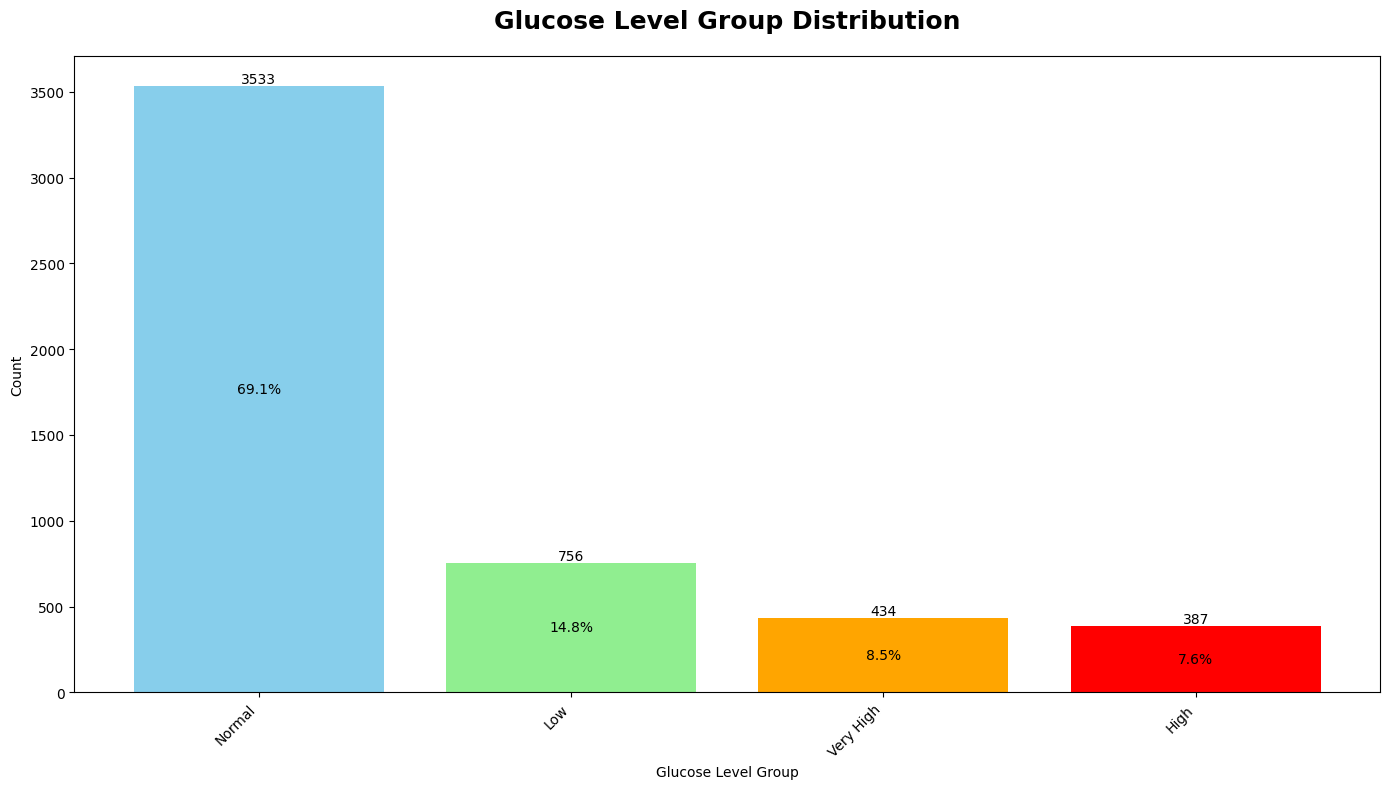

In [ ]:
# Calculate value counts and percentages for each glucose level group
glucose_group_counts = dfc['Glucose_Level_Group'].value_counts()
glucose_group_percentages = (glucose_group_counts / len(dfc)) * 100

# Create a bar plot with customizations
plt.figure(figsize=(14, 8))
bars = plt.bar(glucose_group_counts.index, glucose_group_counts.values, color=['skyblue', 'lightgreen', 'orange', 'red'])

# Add percentage labels inside each bar
for bar, percentage in zip(bars, glucose_group_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=10)

# Add value counts on top of each bar
for bar, count in zip(bars, glucose_group_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Glucose Level Group')
plt.ylabel('Count')
plt.title('Glucose Level Group Distribution', pad=20, fontsize=18, fontweight='bold', color='Black')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


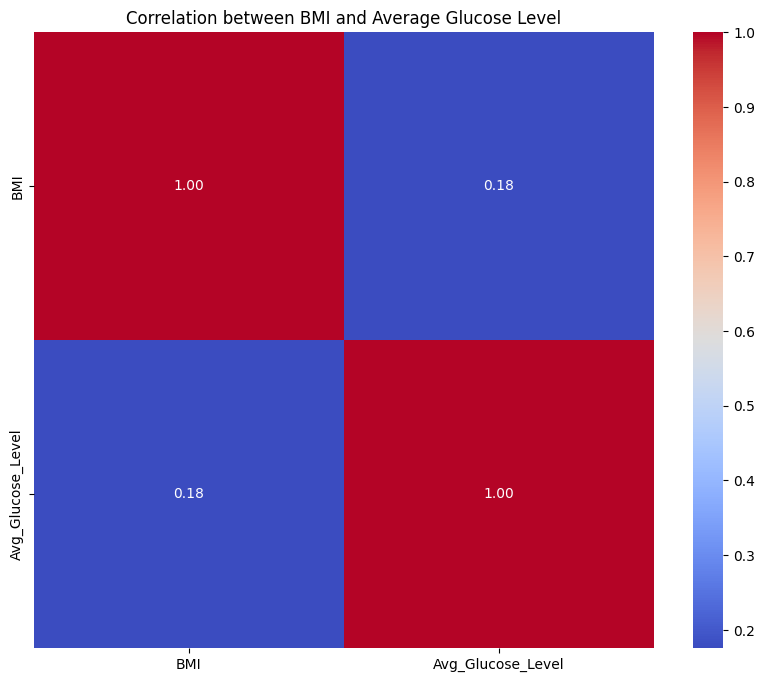

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(dfc[['BMI', 'Avg_Glucose_Level']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between BMI and Average Glucose Level')
plt.show()

In [ ]:
correlation_positive = dfc[dfc['Stroke'] == 1][['BMI', 'Avg_Glucose_Level']].corr()
correlation_negative = dfc[dfc['Stroke'] == 0][['BMI', 'Avg_Glucose_Level']].corr()

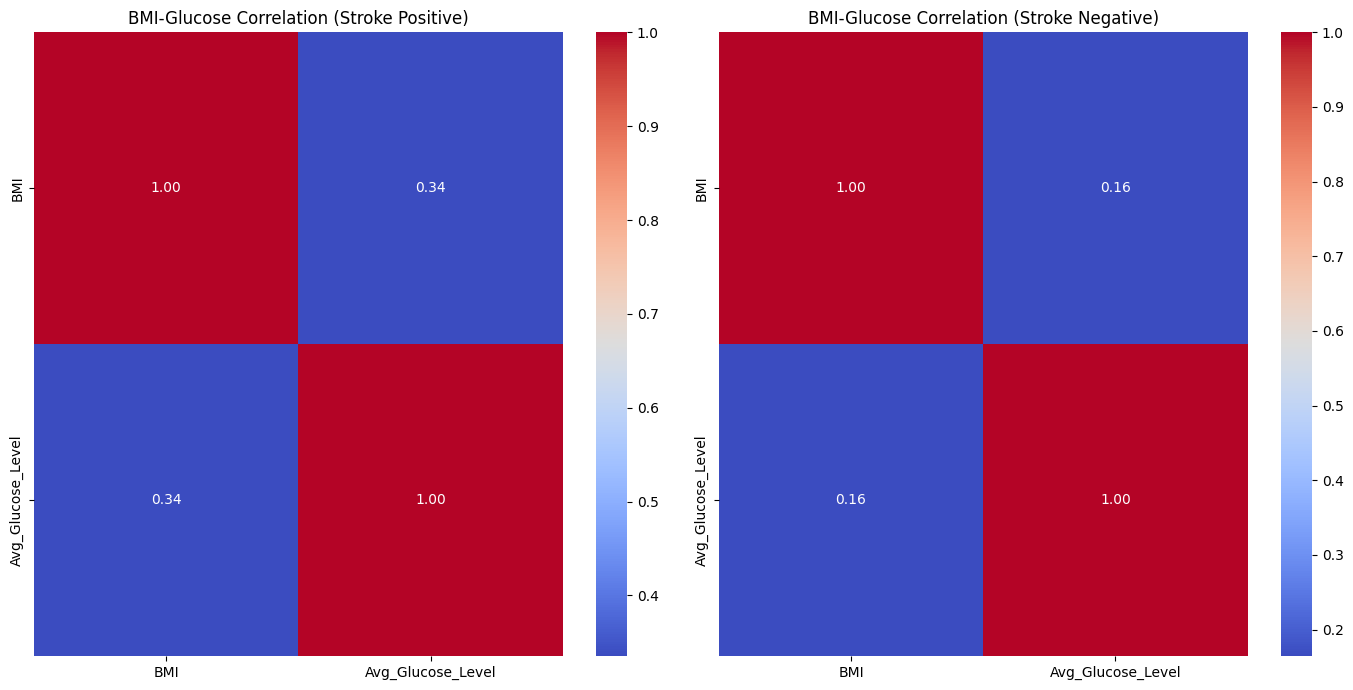

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_positive, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BMI-Glucose Correlation (Stroke Positive)')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_negative, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BMI-Glucose Correlation (Stroke Negative)')

plt.tight_layout()
plt.show()


In [ ]:
htcorrelation_positive = dfc[dfc['Hypertension'] == 1][['BMI', 'Avg_Glucose_Level']].corr()
htcorrelation_negative = dfc[dfc['Hypertension'] == 0][['BMI', 'Avg_Glucose_Level']].corr()

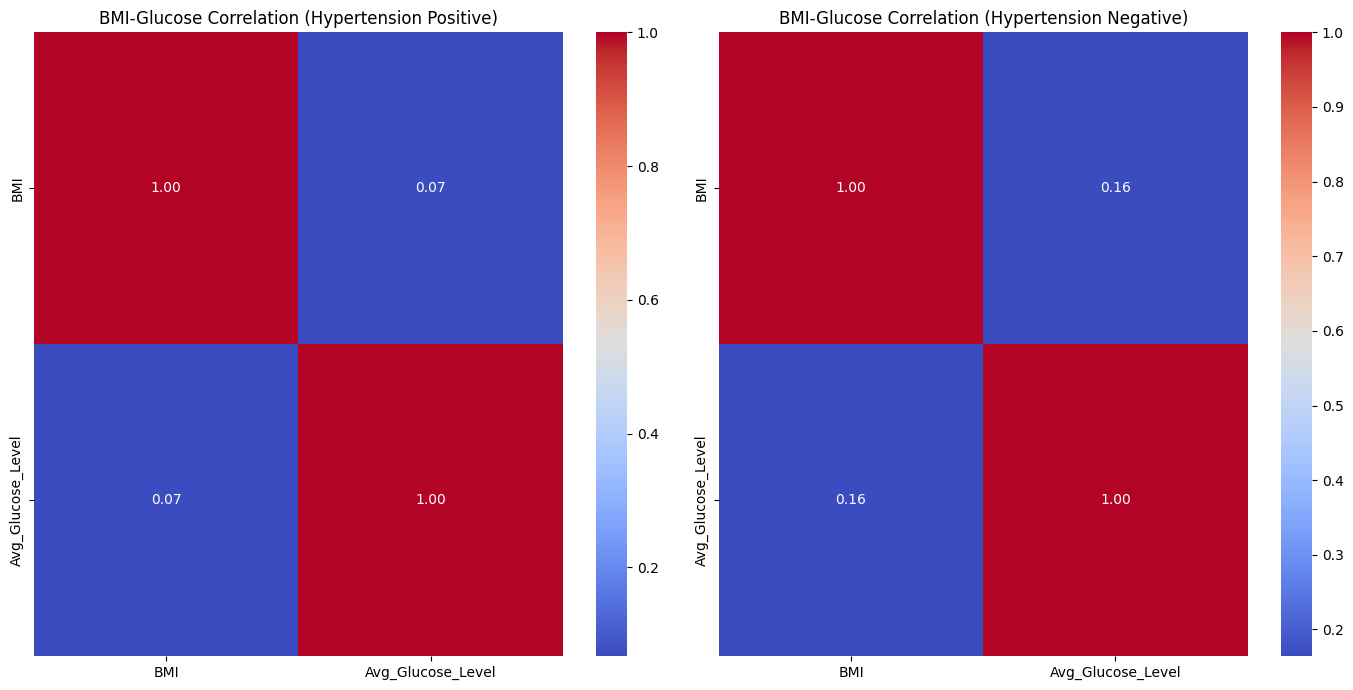

In [ ]:
htcorrelation_positive = dfc[dfc['Hypertension'] == 1][['BMI', 'Avg_Glucose_Level']].corr()
htcorrelation_negative = dfc[dfc['Hypertension'] == 0][['BMI', 'Avg_Glucose_Level']].corr()
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.heatmap(htcorrelation_positive, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BMI-Glucose Correlation (Hypertension Positive)')

plt.subplot(1, 2, 2)
sns.heatmap(htcorrelation_negative, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BMI-Glucose Correlation (Hypertension Negative)')

plt.tight_layout()
plt.show()

In [ ]:
hdcorrelation_positive = dfc[dfc['Heart_Disease'] == 1][['BMI', 'Avg_Glucose_Level']].corr()
hdcorrelation_negative = dfc[dfc['Heart_Disease'] == 0][['BMI', 'Avg_Glucose_Level']].corr()

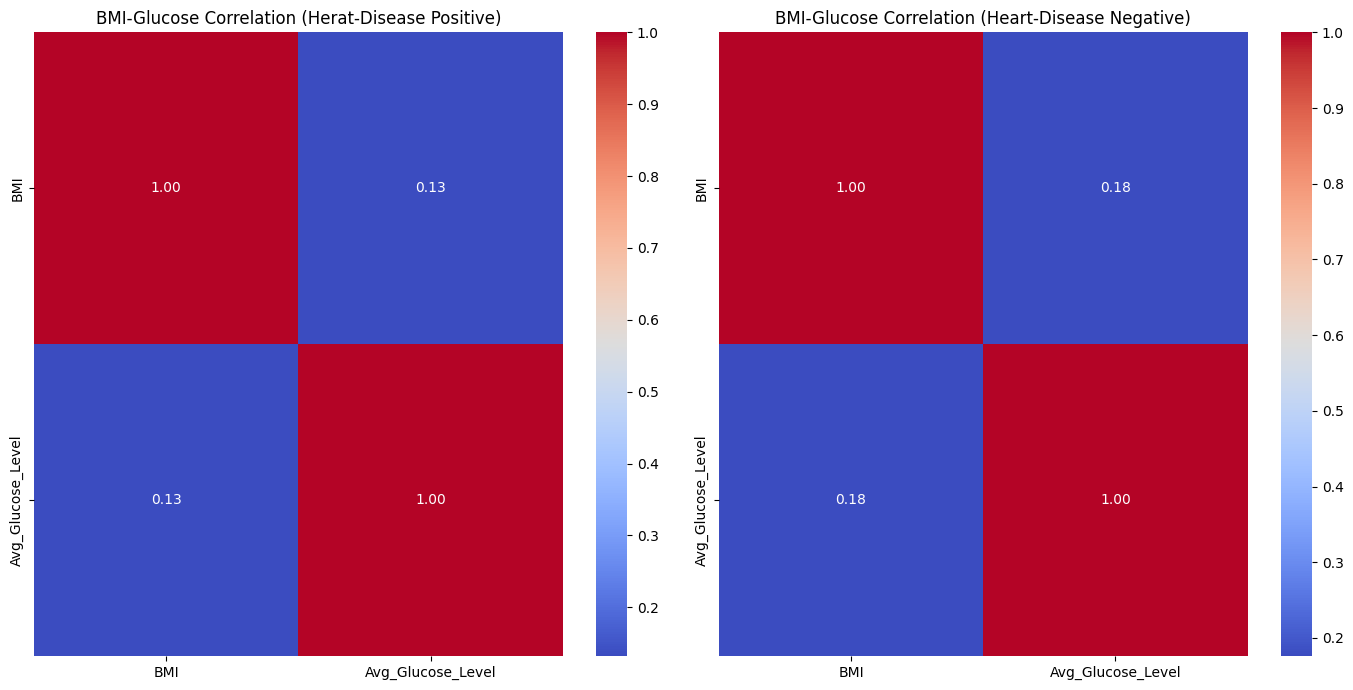

In [ ]:
hdcorrelation_positive = dfc[dfc['Heart_Disease'] == 1][['BMI', 'Avg_Glucose_Level']].corr()
hdcorrelation_negative = dfc[dfc['Heart_Disease'] == 0][['BMI', 'Avg_Glucose_Level']].corr()
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.heatmap(hdcorrelation_positive, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BMI-Glucose Correlation (Herat-Disease Positive)')

plt.subplot(1, 2, 2)
sns.heatmap(hdcorrelation_negative, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('BMI-Glucose Correlation (Heart-Disease Negative)')

plt.tight_layout()
plt.show()

In [ ]:
dfc['Hypertension'].value_counts()

,count
Hypertension,
0,4612
1,498


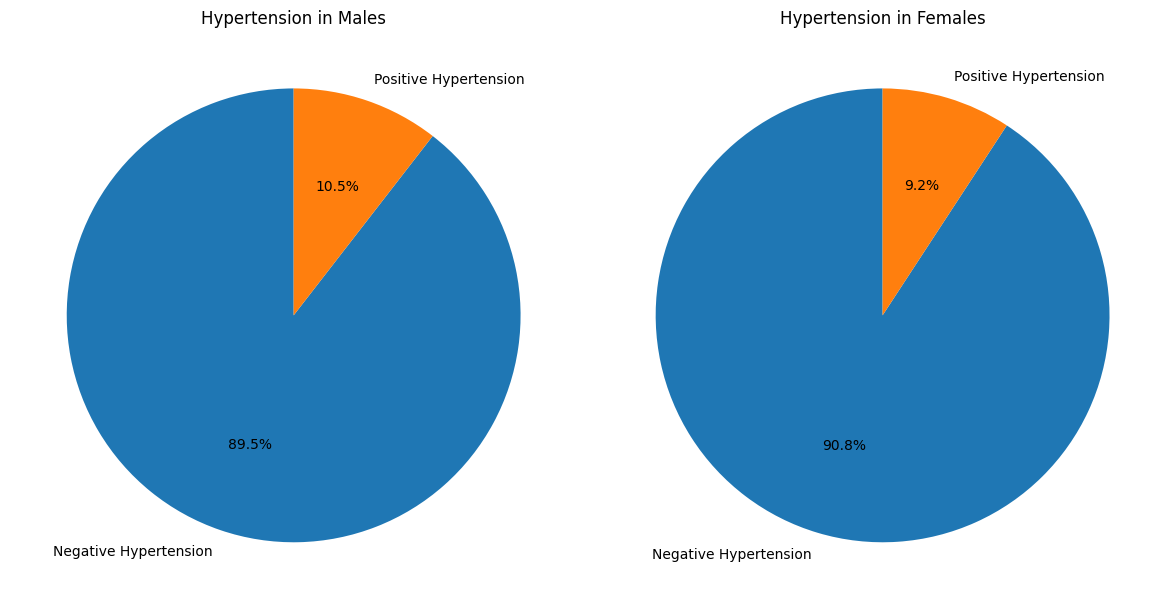

In [ ]:
# Create the pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for males
male_data = dfc[dfc['Gender'] == 'Male']['Hypertension'].value_counts()
male_labels = ['Negative Hypertension', 'Positive Hypertension']
axes[0].pie(male_data, labels=male_labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Hypertension in Males')

# Pie chart for females
female_data = dfc[dfc['Gender'] == 'Female']['Hypertension'].value_counts()
female_labels = ['Negative Hypertension', 'Positive Hypertension']
axes[1].pie(female_data, labels=female_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Hypertension in Females')

plt.tight_layout()
plt.show()

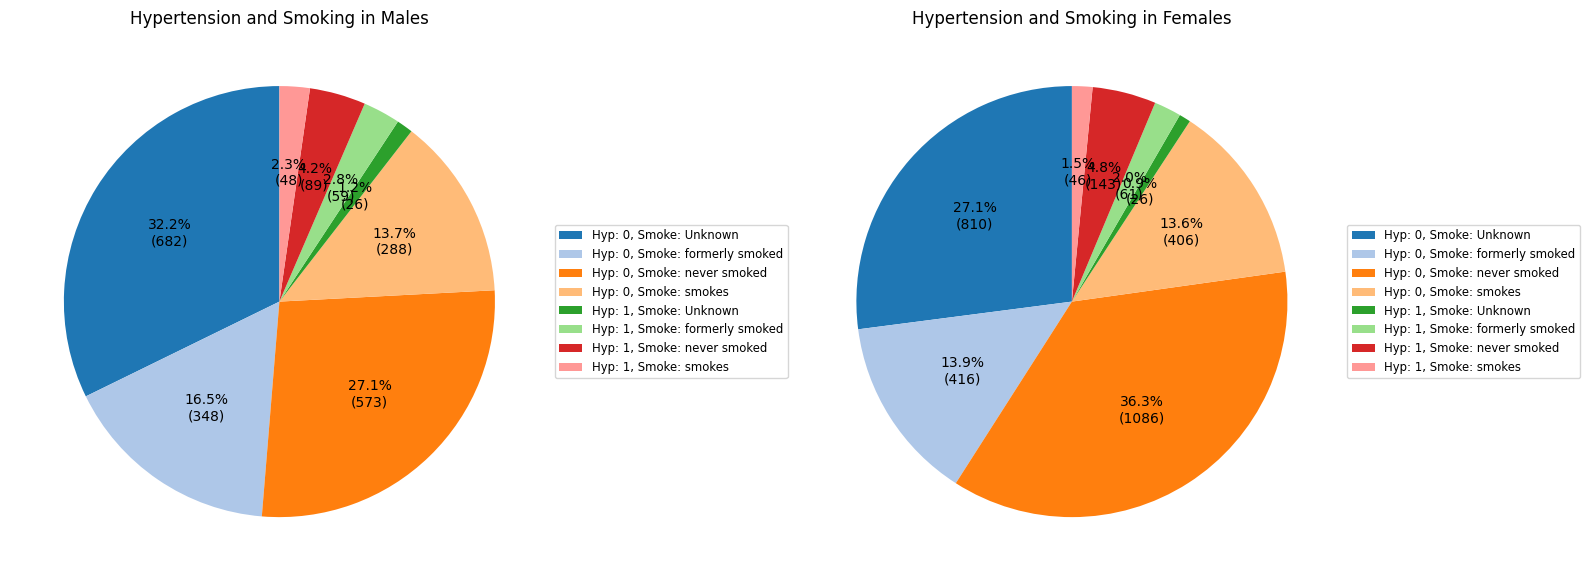

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Grouping and preparing data
male_data = dfc[dfc['Gender'] == 'Male'].groupby(['Hypertension', 'Smoking_Status']).size()
female_data = dfc[dfc['Gender'] == 'Female'].groupby(['Hypertension', 'Smoking_Status']).size()

# Labels for the legend (shortened for clarity)
male_labels = [f"Hyp: {h}, Smoke: {s}" for (h, s) in male_data.index]
female_labels = [f"Hyp: {h}, Smoke: {s}" for (h, s) in female_data.index]

# Colors for the slices
colors = plt.cm.tab20.colors

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for Males
axes[0].pie(
    male_data,
    labels=None,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(male_data) / 100)})',
    startangle=90,
    colors=colors
)
axes[0].set_title('Hypertension and Smoking in Males')
axes[0].legend(male_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Pie chart for Females
axes[1].pie(
    female_data,
    labels=None,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(female_data) / 100)})',
    startangle=90,
    colors=colors
)
axes[1].set_title('Hypertension and Smoking in Females')
axes[1].legend(female_labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Layout adjustment
plt.tight_layout()
plt.show()


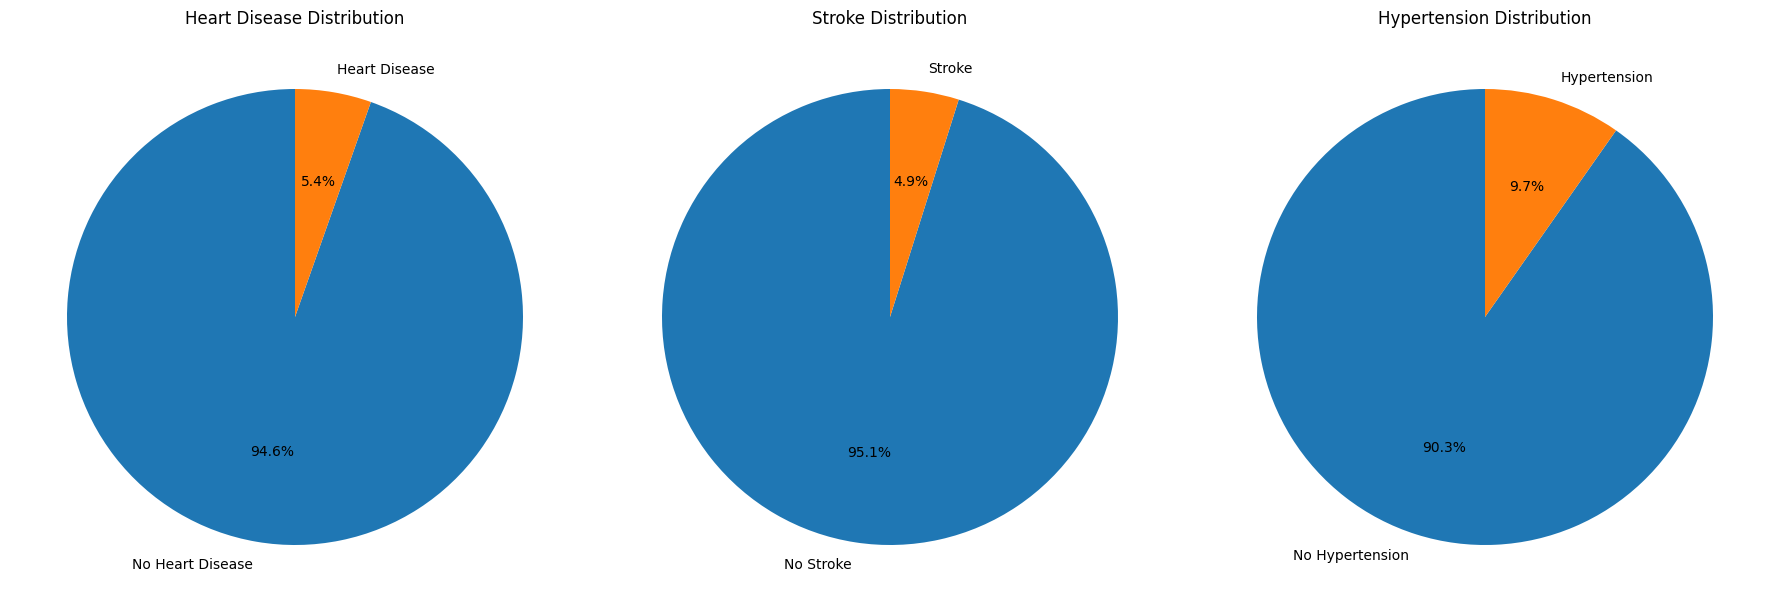

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for Heart Disease
heart_disease_data = dfc['Heart_Disease'].value_counts()
heart_disease_labels = ['No Heart Disease', 'Heart Disease']
axes[0].pie(heart_disease_data, labels=heart_disease_labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Heart Disease Distribution')

# Pie chart for Stroke
stroke_data = dfc['Stroke'].value_counts()
stroke_labels = ['No Stroke', 'Stroke']
axes[1].pie(stroke_data, labels=stroke_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Stroke Distribution')

# Pie chart for Hypertension (from your existing code)
hypertension_data = dfc['Hypertension'].value_counts()
hypertension_labels = ['No Hypertension', 'Hypertension']
axes[2].pie(hypertension_data, labels=hypertension_labels, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Hypertension Distribution')


plt.tight_layout()
plt.show()

In [ ]:
dfc_grouped1 = dfc.groupby(['Hypertension', 'Stroke']).size().unstack(fill_value=0)
dfc_grouped_percent1 = dfc_grouped1.div(dfc_grouped1.sum(axis=1), axis=0) * 100

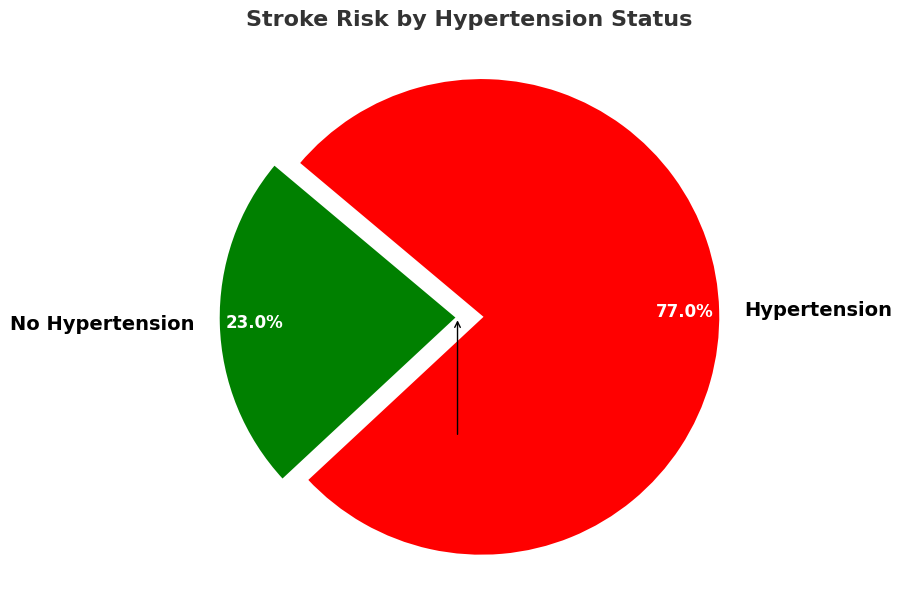

In [ ]:
labels = ['No Hypertension', 'Hypertension']
sizes = dfc_grouped_percent1[1]
colors = ['green', 'red']
explode = [0, 0.1]

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'linestyle': 'solid'}
)
plt.setp(autotexts, size=12, weight="bold", color='white')
plt.setp(texts, size=14, weight="bold", color='black')
ax.set_title('Stroke Risk by Hypertension Status', fontsize=16, weight='bold', color='#333333', pad=20)

ax.annotate('', xy=(0, 0), xytext=(0, -0.5),
            arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=1))

ax.axis('equal')

plt.tight_layout()
plt.show()

In [ ]:
dfc_grouped = dfc.groupby(['Heart_Disease', 'Stroke']).size().unstack(fill_value=0)
dfc_grouped_percent = dfc_grouped.div(dfc_grouped.sum(axis=1), axis=0) * 100

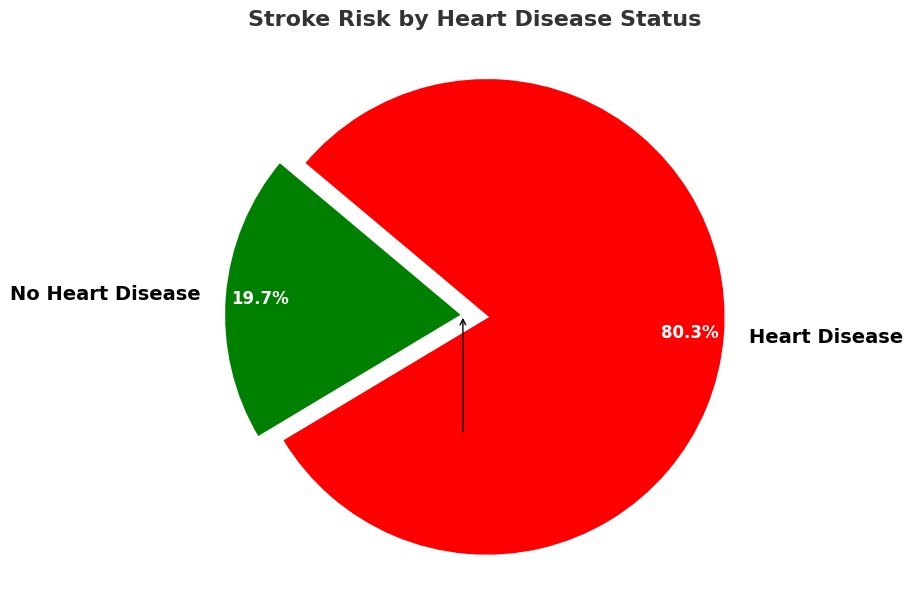

In [ ]:
labels = ['No Heart Disease', 'Heart Disease']
sizes = dfc_grouped_percent[1]
colors = ['green', 'red']
explode = [0, 0.1]

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'linestyle': 'solid'}
)
plt.setp(autotexts, size=12, weight="bold", color='white')
plt.setp(texts, size=14, weight="bold", color='black')
ax.set_title('Stroke Risk by Heart Disease Status', fontsize=16, weight='bold', color='#333333', pad=20)

ax.annotate('', xy=(0, 0), xytext=(0, -0.5),
            arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='->', lw=1))

ax.axis('equal')

plt.tight_layout()
plt.show()

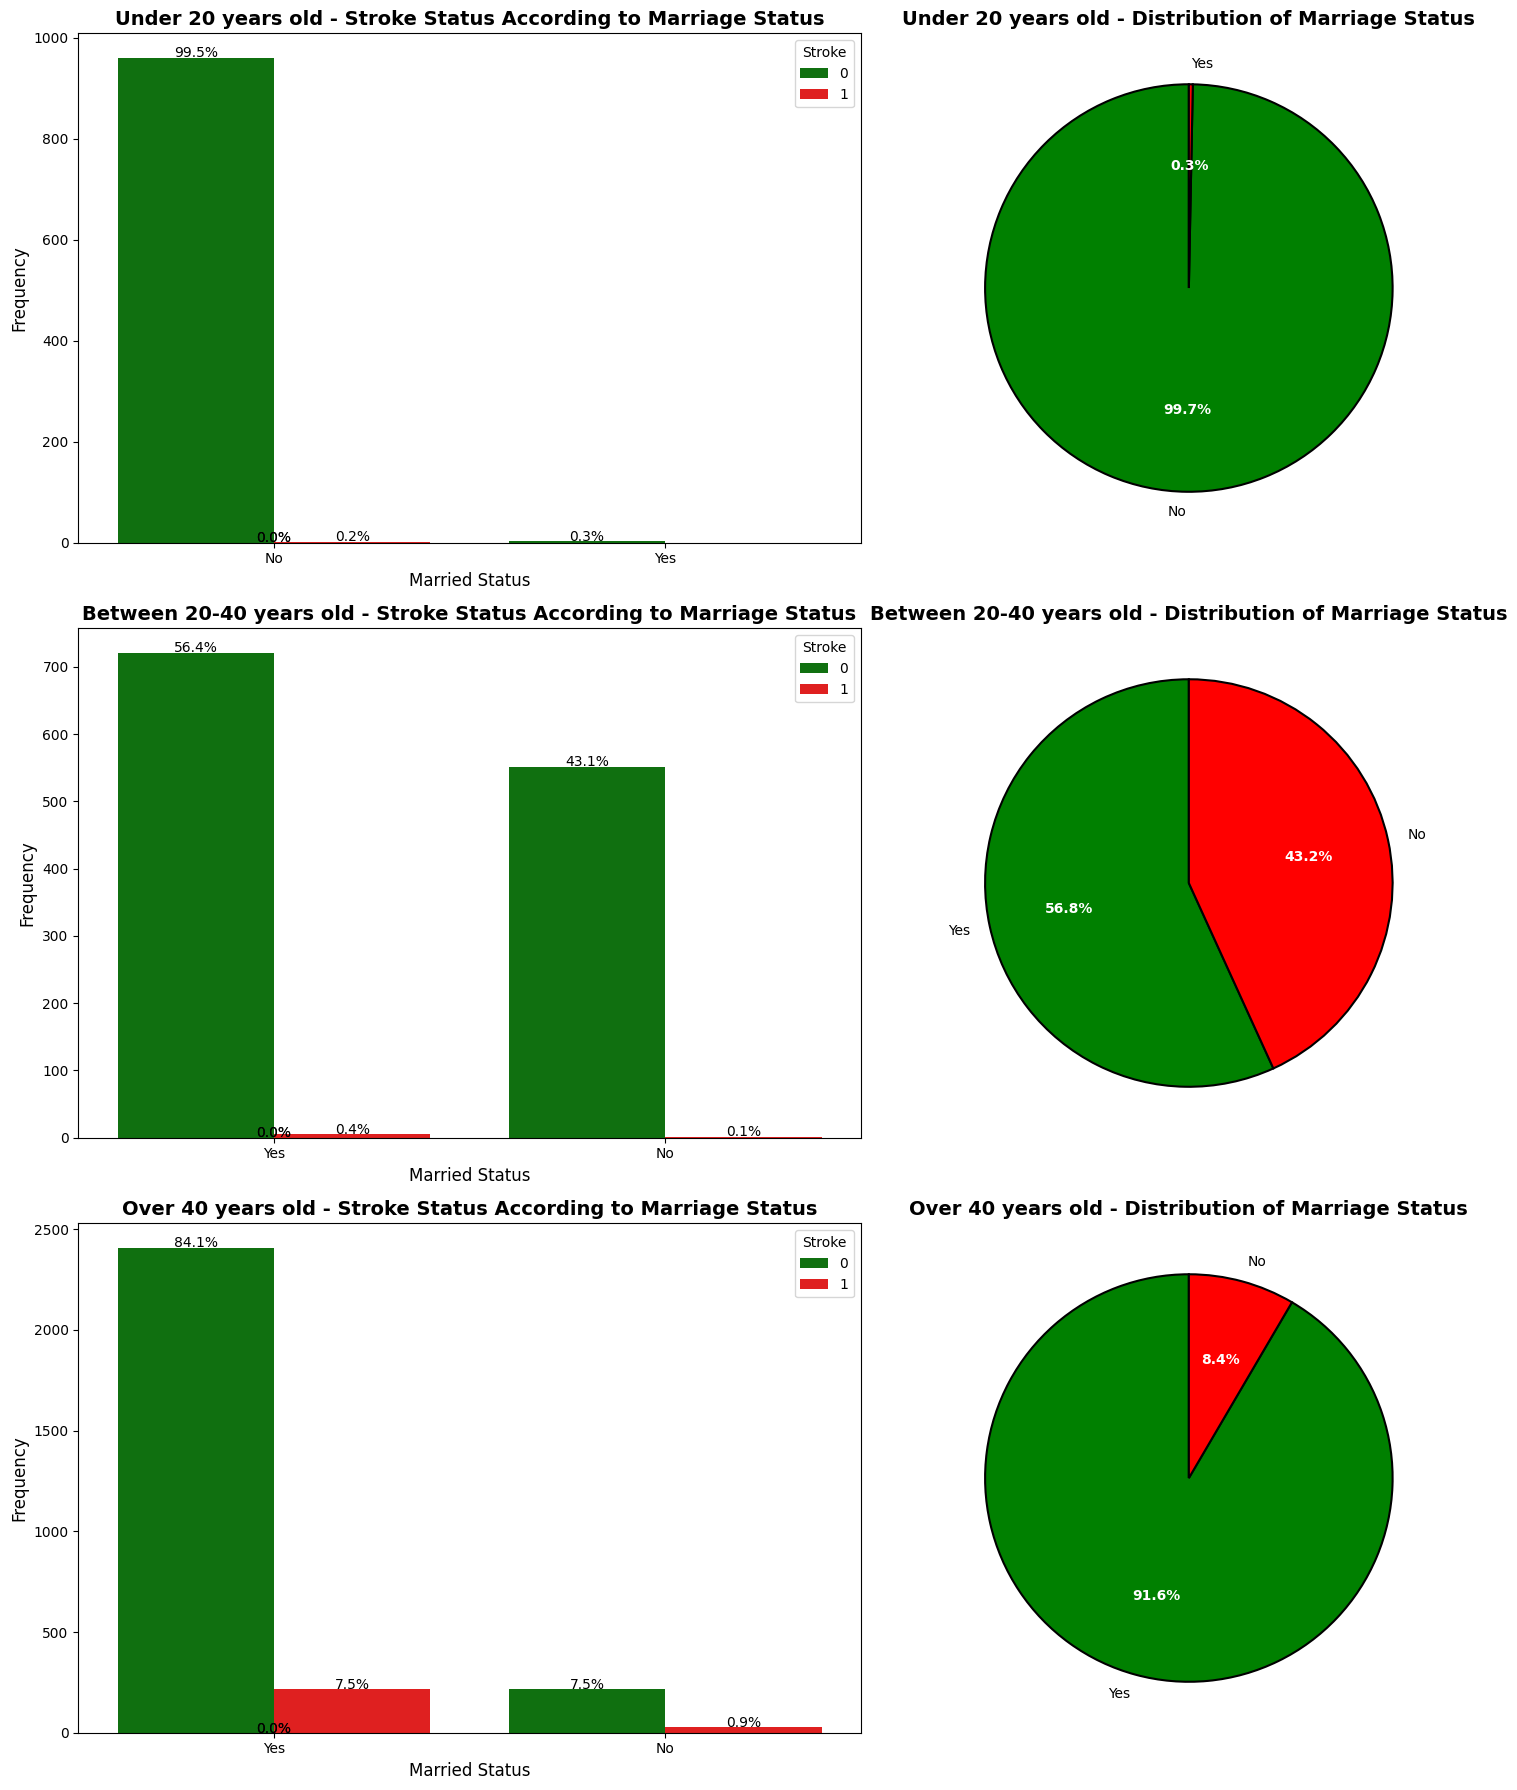

In [ ]:
under_20 = dfc[dfc['Age'] < 20]
between_20_40 = dfc[(dfc['Age'] >= 20) & (dfc['Age'] <= 40)]
over_40 = dfc[dfc['Age'] > 40]

age_groups = {
    "Under 20 years old": under_20,
    "Between 20-40 years old": between_20_40,
    "Over 40 years old": over_40
}

fig, axes = plt.subplots(3, 2, figsize=(16, 18))

custom_palette = ["green", "red"]

for idx, (group_name, group_data) in enumerate(age_groups.items()):
    ever_married_value = group_data['Ever_Married'].value_counts()
    countplot = sns.countplot(data=group_data,
                              x='Ever_Married',
                              palette=custom_palette,
                              ax=axes[idx][0],
                              hue='Stroke')
    axes[idx][0].set_title(f'{group_name} - Stroke Status According to Marriage Status', fontsize=14, fontweight='bold')
    axes[idx][0].set_xlabel('Married Status', fontsize=12)
    axes[idx][0].set_ylabel('Frequency', fontsize=12)

    total = len(group_data)
    for p in countplot.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        countplot.text(p.get_x() + p.get_width() / 2, height + 1, f'{percentage:.1f}%', ha="center", fontsize=10)

    wedges, texts, autotexts = axes[idx][1].pie(
        ever_married_value,
        labels=ever_married_value.index,
        colors=custom_palette,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
    )
    axes[idx][1].set_title(f'{group_name} - Distribution of Marriage Status', fontsize=14, fontweight='bold')

    for text in texts:
        text.set_color("black")
    for autotext in autotexts:
        autotext.set_color("white")
        autotext.set_fontweight("bold")

plt.tight_layout()
plt.show()

In [ ]:
stress_analysis = round(dfc.groupby('Work_Type')[['Hypertension', 'Stroke']].mean() * 100,2)
stress_analysis = stress_analysis.rename(columns={'Hypertension': 'Hypertension Rate (%)', 'Stroke': 'Stroke Rate (%)'})

fig = px.imshow(stress_analysis.T,
                labels={'x': 'Work Type', 'y': 'Indicator'},
                x=stress_analysis.index,
                y=stress_analysis.columns,
                color_continuous_scale=['pink', 'red'],
                color_continuous_midpoint=50,
                title='High Blood Pressure , SMOKING and Stroke Rates by Job Type',
                text_auto=True,
                height=600, width=800)

fig.update_layout(
    title_font_size=24,
    title_font_family="Arial, sans-serif",
    title_font_color='black',
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    font=dict(family="Arial, sans-serif", size=12, color='black'),
    coloraxis_colorbar=dict(title='Rate (%)', tickvals=[0, 50, 100], ticktext=['0%', '50%', '100%'])
)

# Use py.iplot for rendering in the notebook
fig.show()

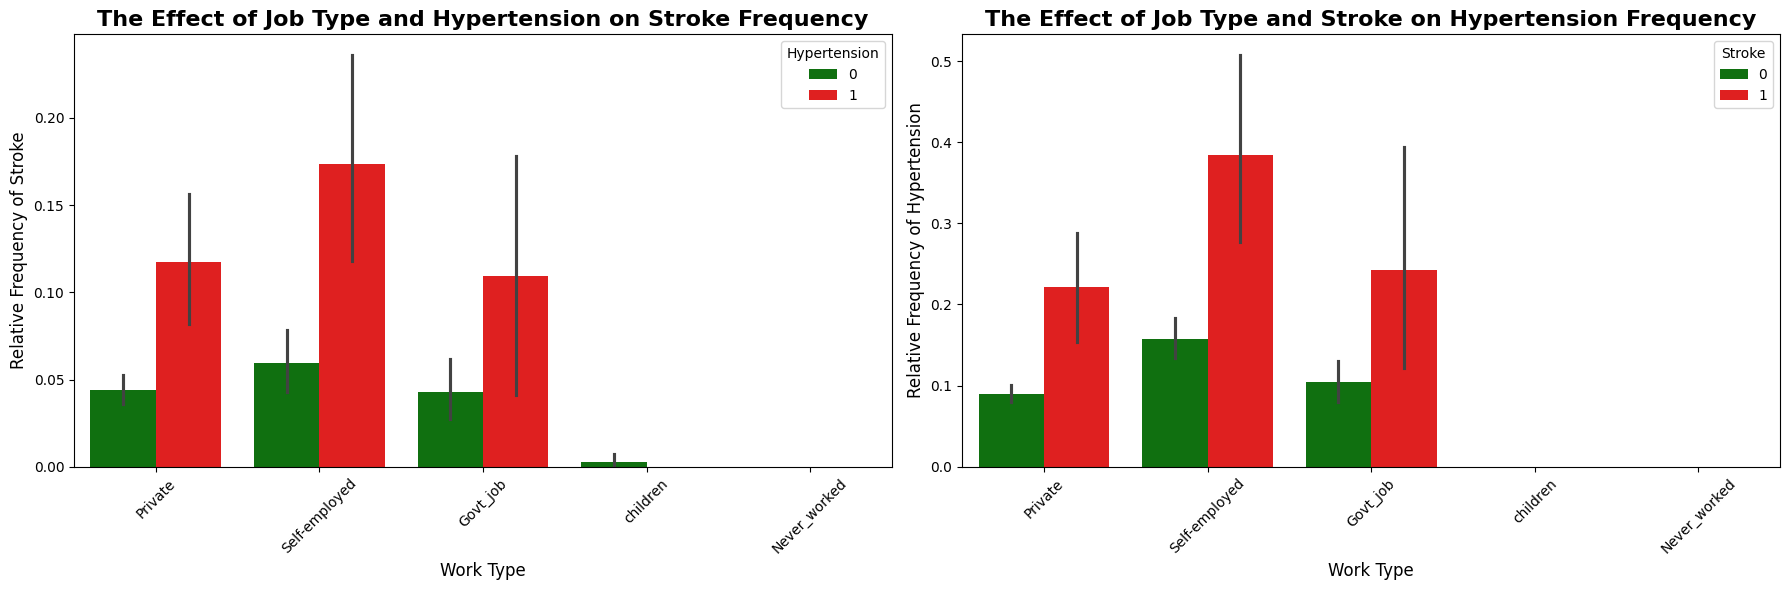

In [ ]:
palette = {0: 'green', 1: 'red'}

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='Work_Type', y='Stroke', hue='Hypertension', data=dfc, palette=palette, ax=axes[0])
axes[0].set_title('The Effect of Job Type and Hypertension on Stroke Frequency', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Work Type', fontsize=12)
axes[0].set_ylabel('Relative Frequency of Stroke', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    x='Work_Type',
    y='Hypertension',
    hue='Stroke',
    data=dfc,
    palette=palette,
    ax=axes[1]
)
axes[1].set_title('The Effect of Job Type and Stroke on Hypertension Frequency', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Work Type', fontsize=12)
axes[1].set_ylabel('Relative Frequency of Hypertension', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

In [ ]:
grouped_work_stress_male = dfc[dfc['Gender'] == 'Male' ].groupby(['Work_Type'])['Stroke'].mean().reset_index()
grouped_lifestyle_stress_male = dfc[dfc['Gender'] == 'Male'].groupby(['Smoking_Status', 'Ever_Married', 'BMI'])['Stroke'].mean().reset_index()

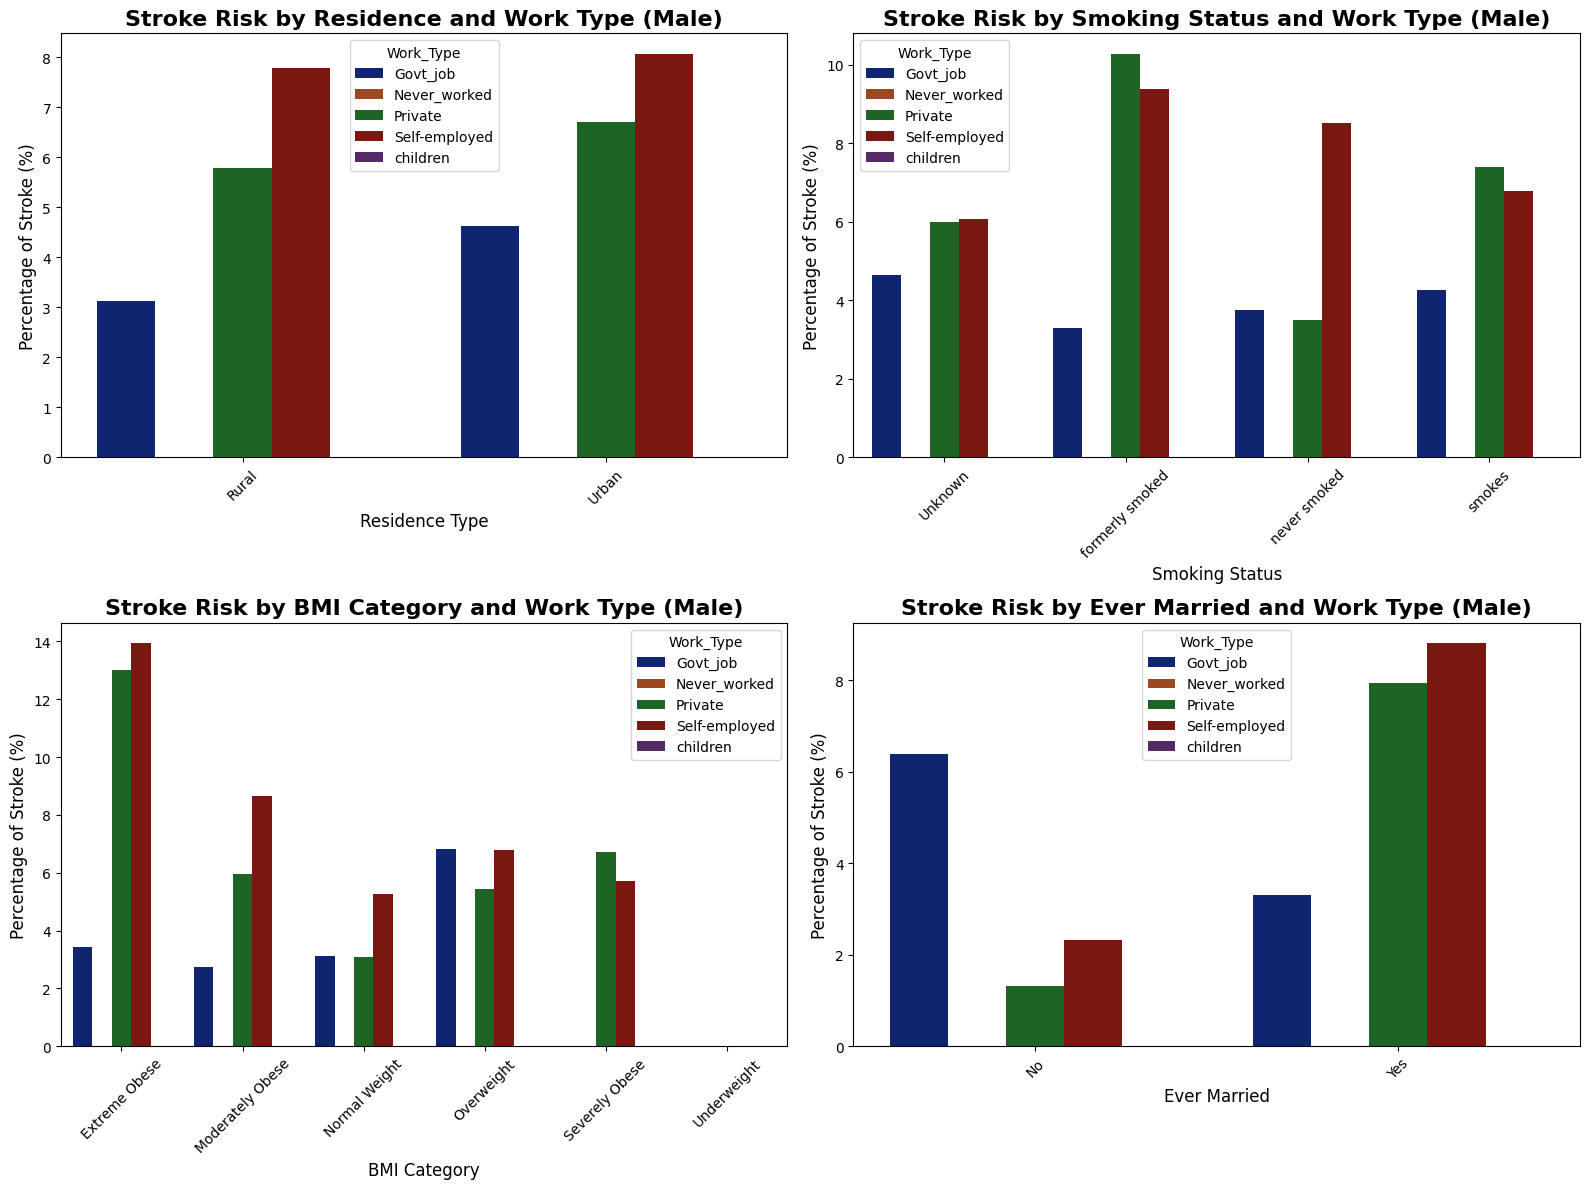

In [ ]:
df_male = dfc[dfc['Gender'] == 'Male']

# Create separate grouped DataFrames for each plot
def create_grouped_data(data, group_cols):
    grouped = data.groupby(group_cols)['Stroke'].mean() * 100
    return grouped.reset_index()

# Create grouped data for each plot
residence_work = create_grouped_data(df_male, ['Residence_Type', 'Work_Type'])
smoking_work = create_grouped_data(df_male, ['Smoking_Status','Work_Type'])
bmi_work = create_grouped_data(df_male, ['BMI_Group', 'Work_Type'])
married_work = create_grouped_data(df_male, ['Ever_Married', 'Work_Type'])

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Residence Type and Work Type
sns.barplot(data=residence_work,
            x='Residence_Type',
            y='Stroke',
            hue='Work_Type',
            palette='dark',
            ax=axes[0,0])

axes[0, 0].set_title('Stroke Risk by Residence and Work Type (Male)', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('Residence Type', fontsize=12)
axes[0, 0].set_ylabel('Percentage of Stroke (%)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)


# Plot 2: Smoking Status and Work Type
sns.barplot(data=smoking_work,
            x='Smoking_Status',
            y='Stroke',
            hue= 'Work_Type',
            palette='dark',
            ax=axes[0, 1])

axes[0, 1].set_title('Stroke Risk by Smoking Status and Work Type (Male)', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('Smoking Status', fontsize=12)
axes[0, 1].set_ylabel('Percentage of Stroke (%)', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: BMI Group and Work Type
sns.barplot(data=bmi_work,
            x='BMI_Group',
            y='Stroke',
            hue= 'Work_Type',
            palette='dark',
            ax=axes[1, 0])

axes[1, 0].set_title('Stroke Risk by BMI Category and Work Type (Male)', fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel('BMI Category', fontsize=12)
axes[1, 0].set_ylabel('Percentage of Stroke (%)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Marriage Status and Work Type
sns.barplot(data=married_work,
            x='Ever_Married',
            y='Stroke',
            hue='Work_Type',
            palette='dark',
            ax=axes[1, 1])

axes[1, 1].set_title('Stroke Risk by Ever Married and Work Type (Male)', fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel('Ever Married', fontsize=12)
axes[1, 1].set_ylabel('Percentage of Stroke (%)', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
import dash
from dash import dcc, html
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

# Assuming dfc is already loaded and preprocessed
# Add these preprocessing steps if not already present
bins = [0, 70, 140, 200, dfc['Avg_Glucose_Level'].max()]
labels = ['Low', 'Normal', 'High', 'Very High']
dfc['Glucose_Level_Group'] = pd.cut(dfc['Avg_Glucose_Level'], bins=bins, labels=labels)
label_map = {0:'Never Worked', 1:'Child', 2:'Govt Job', 3:'Self-Employed', 4:'Private'}
dfc['Work_Type'].map(label_map)

# --------------------------
# Visualization Functions
# --------------------------

def create_bmi_group_chart():
    bmi_group_counts = dfc['BMI_Group'].value_counts()
    bmi_group_percentages = (bmi_group_counts / len(dfc)) * 100

    fig = go.Figure(go.Bar(
        x=bmi_group_counts.index,
        y=bmi_group_counts.values,
        marker_color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue', 'orange', 'violet'],
        text=[f'{count}<br>({pct:.1f}%)' for count, pct in zip(bmi_group_counts.values, bmi_group_percentages)],
        textposition='auto'
    ))

    fig.update_layout(
        title='BMI Group Distribution',
        xaxis_title='BMI Group',
        yaxis_title='Count',
        xaxis_tickangle=-45,
        hovermode="x"
    )
    return fig

def create_bmi_age_boxplot():
    fig = px.box(dfc, x='AgeCategory', y='BMI', color='AgeCategory',
                color_discrete_sequence=px.colors.qualitative.Set3)

    # Add reference lines
    ref_lines = [
        (18.5, 'green', 'Underweight'),
        (24.9, 'blue', 'Normal'),
        (29.9, 'orange', 'Overweight'),
        (34.9, 'red', 'Obese')
    ]

    for y, color, name in ref_lines:
        fig.add_hline(
            y=y,
            line_dash="dot",
            line_color=color,
            annotation_text=name,
            annotation_position="top right"
        )

    fig.update_layout(
        title='BMI Distribution by Age Group',
        xaxis_title='Age Category',
        yaxis_title='BMI',
        showlegend=False
    )
    return fig

def create_glucose_chart():
    glucose_group_counts = dfc['Glucose_Level_Group'].value_counts()
    glucose_percentages = (glucose_group_counts / len(dfc)) * 100

    fig = go.Figure(go.Bar(
        x=glucose_group_counts.index,
        y=glucose_group_counts.values,
        marker_color=['skyblue', 'lightgreen', 'orange', 'red'],
        text=[f'{count}<br>({pct:.1f}%)' for count, pct in zip(glucose_group_counts.values, glucose_percentages)],
        textposition='auto'
    ))

    fig.update_layout(
        title='Glucose Level Distribution',
        xaxis_title='Glucose Level Group',
        yaxis_title='Count',
        xaxis_tickangle=-45
    )
    return fig

def create_main_correlation_heatmap():
    corr_matrix = dfc[['BMI', 'Avg_Glucose_Level']].corr().round(2)
    fig = px.imshow(
        corr_matrix,
        text_auto=True,
        color_continuous_scale='Inferno',
        zmin=-1,
        zmax=1
    )
    fig.update_layout(title='BMI-Glucose Correlation')
    return fig

def create_comparative_heatmap(condition):
    pos_corr = dfc[dfc[condition] == 1][['BMI', 'Avg_Glucose_Level']].corr().round(2)
    neg_corr = dfc[dfc[condition] == 0][['BMI', 'Avg_Glucose_Level']].corr().round(2)

    fig = make_subplots(
        rows=1,
        cols=2,
        subplot_titles=[f"{condition} Positive", f"{condition} Negative"]
    )

    fig.add_trace(
        go.Heatmap(
            z=pos_corr.values,
            x=pos_corr.columns,
            y=pos_corr.index,
            colorscale='Inferno',
            zmin=-1,
            zmax=1,
            text=pos_corr.values,
            texttemplate="%{text}"
        ),
        row=1,
        col=1
    )

    fig.add_trace(
        go.Heatmap(
            z=neg_corr.values,
            x=neg_corr.columns,
            y=neg_corr.index,
            colorscale='Inferno',
            zmin=-1,
            zmax=1,
            text=neg_corr.values,
            texttemplate="%{text}"
        ),
        row=1,
        col=2
    )

    fig.update_layout(title_text=f'BMI-Glucose Correlation by {condition}')
    return fig

def create_hypertension_pie():
    # Ensure gender values match your data encoding (adjust if needed)
    male_data = dfc[dfc['Gender'] =='Male']['Hypertension'].value_counts()
    female_data = dfc[dfc['Gender'] == 'Female']['Hypertension'].value_counts()

    fig = make_subplots(
        rows=1,
        cols=2,
        specs=[[{'type':'pie'}, {'type':'pie'}]],
        subplot_titles=['Males', 'Females']
    )

    # Male pie
    fig.add_trace(go.Pie(
        labels=['No Hypertension', 'Hypertension'],
        values=male_data.values,
        name='Males',
        hole=0.4,
        marker_colors=['#1f77b4', '#ff7f0e']
    ), 1, 1)

    # Female pie
    fig.add_trace(go.Pie(
        labels=['No Hypertension', 'Hypertension'],
        values=female_data.values,
        name='Females',
        hole=0.4,
        marker_colors=['#1f77b4', '#ff7f0e']
    ), 1, 2)

    fig.update_layout(
        title_text='Hypertension Distribution by Gender',
        uniformtext_minsize=12,
        uniformtext_mode='hide'
    )
    return fig

def create_stress_analysis():
    # Ensure correct grouping and calculations
    stress_analysis = dfc.groupby('Work_Type').agg({
        'Hypertension': 'mean',
        'Stroke': 'mean',

    }) * 100

    # Round and format
    stress_analysis = stress_analysis.round(2)

    # Create annotated heatmap
    fig = go.Figure(go.Heatmap(
        z=stress_analysis.T.values,
        x=stress_analysis.index.tolist(),
        y=stress_analysis.columns.tolist(),
        zmin=0,
        zmax=100,
        colorscale='Reds',
        text=stress_analysis.T.values,
        texttemplate="%{text}%",
        hoverinfo="x+y+z"
    ))

    fig.update_layout(
        title='Health Indicators by Job Type',
        xaxis_title='Work Type',
        yaxis_title='Health Indicator',
        height=500,
        coloraxis_colorbar=dict(
            title="Percentage (%)",
            ticksuffix="%"
        )
    )
    return fig

# --------------------------
# Updated Dashboard Layout
# --------------------------
app = dash.Dash(__name__, suppress_callback_exceptions=True)
app.layout = html.Div([
    html.H1("Stroke Analysis Dashboard",
           style={'textAlign': 'center', 'padding': '20px'}),

    # Hypertension Pies Row
    html.Div([
        html.Div([
            dcc.Graph(figure=create_hypertension_pie())
        ], className='twelve columns')
    ], className='row'),

    # Stress Analysis Row
    html.Div([
        html.Div([
            dcc.Graph(figure=create_stress_analysis())
        ], className='twelve columns')
    ], className='row'),

    # ... rest of your layout ...
], style={'backgroundColor': '#f5f5f5'})

def create_stroke_risk_pies():
    fig = make_subplots(
        rows=1,
        cols=2,
        specs=[[{'type':'pie'}, {'type':'pie'}]],
        subplot_titles=['Hypertension', 'Heart Disease']
    )

    # Hypertension pie
    sizes_ht = dfc.groupby('Hypertension')['Stroke'].mean() * 100
    fig.add_trace(
        go.Pie(
            labels=['No Hypertension', 'Hypertension'],
            values=sizes_ht.values,
            hole=0.4,
            marker_colors=['green', 'red']
        ),
        row=1,
        col=1
    )

    # Heart Disease pie
    sizes_hd = dfc.groupby('Heart_Disease')['Stroke'].mean() * 100
    fig.add_trace(
        go.Pie(
            labels=['No Heart Disease', 'Heart Disease'],
            values=sizes_hd.values,
            hole=0.4,
            marker_colors=['green', 'red']
        ),
        row=1,
        col=2
    )

    fig.update_layout(title_text='Stroke Risk by Condition')
    return fig

# --------------------------
# Dashboard Layout
# --------------------------

app = dash.Dash(__name__, suppress_callback_exceptions=True)

app.layout = html.Div([
    html.H1("Stroke Analysis Dashboard",
           style={'textAlign': 'center', 'padding': '20px'}),

    # First Row
    html.Div([
        html.Div([dcc.Graph(figure=create_bmi_group_chart())], className='six columns'),
        html.Div([dcc.Graph(figure=create_bmi_age_boxplot())], className='six columns')
    ], className='row'),

    # Second Row
    html.Div([
        html.Div([dcc.Graph(figure=create_glucose_chart())], className='six columns'),
        html.Div([dcc.Graph(figure=create_main_correlation_heatmap())], className='six columns')
    ], className='row'),

    # Third Row (Comparative Heatmaps)
    html.Div([
        html.Div([dcc.Graph(figure=create_comparative_heatmap('Stroke'))], className='six columns'),
        html.Div([dcc.Graph(figure=create_comparative_heatmap('Hypertension'))], className='six columns')
    ], className='row'),

    # Fourth Row
    html.Div([
        html.Div([dcc.Graph(figure=create_comparative_heatmap('Heart_Disease'))], className='six columns'),
        html.Div([dcc.Graph(figure=create_hypertension_pie())], className='six columns')
    ], className='row'),

    # Fifth Row
    html.Div([
        html.Div([dcc.Graph(figure=create_stroke_risk_pies())], className='six columns'),
        html.Div([dcc.Graph(figure=create_stress_analysis())], className='six columns')
    ], className='row')
], style={'backgroundColor': '#f5f5f5'})

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

#MODELING TIME

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier

from xgboost import XGBClassifier
from scipy import stats
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import joblib
import pickle

import warnings
warnings.filterwarnings("ignore")

# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.base import BaseEstimator, TransformerMixin




In [ ]:
dfc.drop('Id', axis=1, inplace=True)

In [ ]:
dfc.columns

Index(['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'BMI',
       'Smoking_Status', 'Stroke', 'AgeCategory', 'BMI_Group',
       'Glucose_Level_Group'],
      dtype='object')

In [ ]:
dfc.dropna(inplace=True)

In [ ]:
dfc.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,AgeCategory,BMI_Group,Glucose_Level_Group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior,Severely Obese,Very High
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior,Moderately Obese,Normal
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Middle Aged,Moderately Obese,High
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior,Normal Weight,High
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Senior,Overweight,High


In [ ]:
gender_encoder = LabelEncoder()
ever_married_encoder = LabelEncoder()
work_type_encoder = LabelEncoder()
residence_type_encoder = LabelEncoder()
smoking_status_encoder = LabelEncoder()

gg_encoder = LabelEncoder()
bg_encoder = LabelEncoder()
ag_encoder = LabelEncoder()

dfc['AgeCategory'] = ag_encoder.fit_transform(dfc['AgeCategory'].values)
dfc['BMI_Group'] = bg_encoder.fit_transform(dfc['BMI_Group'].values)
dfc['Glucose_Level_Group'] = gg_encoder.fit_transform(dfc['Glucose_Level_Group'].values)
dfc['Gender'] = gender_encoder.fit_transform(dfc['Gender'].values)
dfc['Ever_Married'] = ever_married_encoder.fit_transform(dfc['Ever_Married'].values)
dfc['Work_Type'] = work_type_encoder.fit_transform(dfc['Work_Type'].values)
dfc['Residence_Type'] = residence_type_encoder.fit_transform(dfc['Residence_Type'].values)
dfc['Smoking_Status'] = smoking_status_encoder.fit_transform(dfc['Smoking_Status'].values)

##Expirment number one all data

In [ ]:
X_columns_list=[ 'Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married','Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'BMI','Smoking_Status','AgeCategory', 'BMI_Group','Glucose_Level_Group']

X, y = dfc[X_columns_list], dfc['Stroke']
X

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,AgeCategory,BMI_Group,Glucose_Level_Group
0,1,67.0,0,1,1,2,1,228.69,36.6,1,6,4,3
2,1,80.0,0,1,1,2,0,105.92,32.5,2,6,1,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3,2,1,0
4,0,79.0,1,0,1,3,0,174.12,24.0,2,6,2,0
5,1,81.0,0,0,1,2,1,186.21,29.0,1,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,7,2,2
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,6,4,2
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,1,1,2
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,2,3,0


In [ ]:
SC = StandardScaler()
X = SC.fit_transform(X)

In [ ]:
def evaluate_models(X, y):
    results = []

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
        ('Logistic Regression', LogisticRegression(max_iter=1000)),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('AdaBoost', AdaBoostClassifier()),
        ('Support Vector Machine', SVC()),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ]

    # Evaluate each model
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        results.append((name, accuracy, precision, recall, f1))

    # Create a DataFrame to display results
    df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    df_styled = df.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1'], color='blue')
    display(df_styled)

In [ ]:
evaluate_models(X, y)

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.946029,0.894970,0.946029,0.919791
1,Decision Tree,0.919552,0.909277,0.919552,0.914209
2,Random Forest,0.945010,0.894918,0.945010,0.919282
3,Gradient Boosting,0.941955,0.894761,0.941955,0.917752
4,AdaBoost,0.946029,0.894970,0.946029,0.919791
5,Support Vector Machine,0.946029,0.894970,0.946029,0.919791
6,K-Nearest Neighbors,0.945010,0.894918,0.945010,0.919282
7,Naive Bayes,0.863544,0.925202,0.863544,0.889477
8,XGBoost,0.943992,0.914585,0.943992,0.922374


#Exparment 2

In [ ]:
def evaluate_models1(X, y):
    results = []
    feature_importance = {}

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
        ('Logistic Regression', LogisticRegression(max_iter=1000)),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('AdaBoost', AdaBoostClassifier()),
        ('Support Vector Machine', SVC()),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ]

    # Ensure X_train is a DataFrame with feature names
    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train)
        X_test = pd.DataFrame(X_test)

    # Evaluate each model
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        results.append((name, accuracy, precision, recall, f1))

        # If the model has feature importance (tree-based models)
        if hasattr(model, 'feature_importances_'):
            feature_importance[name] = model.feature_importances_

    # Create a DataFrame to display results
    df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    df_styled = df.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1'], color='blue')
    display(df_styled)

    # Display Feature Importance for tree-based models
    for model_name, importance in feature_importance.items():
        if importance is not None:
            # Ensure we can reference columns correctly
            if isinstance(X_train, pd.DataFrame):
                feature_names = X_train.columns
            else:
                # If X_train is not a DataFrame, pass the columns manually
                feature_names = [f"Feature_{i}" for i in range(X_train.shape[1])]

            feature_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importance
            })
            feature_df = feature_df.sort_values(by='Importance', ascending=False)
            print(f"Feature importance for {model_name}:")
            print(feature_df)


In [ ]:
evaluate_models1(X, y)

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.946029,0.894970,0.946029,0.919791
1,Decision Tree,0.924644,0.910870,0.924644,0.917298
2,Random Forest,0.946029,0.894970,0.946029,0.919791
3,Gradient Boosting,0.941955,0.894761,0.941955,0.917752
4,AdaBoost,0.946029,0.894970,0.946029,0.919791
5,Support Vector Machine,0.946029,0.894970,0.946029,0.919791
6,K-Nearest Neighbors,0.945010,0.894918,0.945010,0.919282
7,Naive Bayes,0.863544,0.925202,0.863544,0.889477
8,XGBoost,0.943992,0.914585,0.943992,0.922374


Feature importance for Decision Tree:
    Feature  Importance
7         7    0.269070
8         8    0.234042
1         1    0.203114
9         9    0.085657
0         0    0.045001
5         5    0.036512
6         6    0.031191
3         3    0.026683
11       11    0.024600
2         2    0.014523
4         4    0.013749
12       12    0.011409
10       10    0.004450
Feature importance for Random Forest:
    Feature  Importance
7         7    0.243852
8         8    0.208937
1         1    0.189163
9         9    0.066838
5         5    0.052726
11       11    0.052096
12       12    0.036466
6         6    0.034196
0         0    0.032828
2         2    0.024806
3         3    0.022591
10       10    0.020554
4         4    0.014946
Feature importance for Gradient Boosting:
    Feature  Importance
7         7    0.423228
1         1    0.340060
8         8    0.092256
5         5    0.050110
3         3    0.029114
9         9    0.017557
2         2    0.014987
11       11    0.0

# Random Undersampling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_unsampled, y_unsampled = rus.fit_resample(X_train, y_train)

In [ ]:
evaluate_models1(X_unsampled, y_unsampled)

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.841270,0.841270,0.841270,0.841270
1,Decision Tree,0.666667,0.682971,0.666667,0.660521
2,Random Forest,0.825397,0.828633,0.825397,0.825133
3,Gradient Boosting,0.809524,0.810967,0.809524,0.809428
4,AdaBoost,0.777778,0.788866,0.777778,0.776087
5,Support Vector Machine,0.825397,0.825813,0.825397,0.825397
6,K-Nearest Neighbors,0.761905,0.764658,0.761905,0.761544
7,Naive Bayes,0.825397,0.825813,0.825397,0.825397
8,XGBoost,0.857143,0.857431,0.857143,0.857071


Feature importance for Decision Tree:
    Feature  Importance
1         1    0.424120
8         8    0.262047
7         7    0.145617
12       12    0.072008
6         6    0.036829
9         9    0.029173
5         5    0.013066
0         0    0.008256
2         2    0.005737
4         4    0.003147
3         3    0.000000
10       10    0.000000
11       11    0.000000
Feature importance for Random Forest:
    Feature  Importance
1         1    0.321238
7         7    0.156333
8         8    0.140647
10       10    0.084044
11       11    0.058952
9         9    0.051087
5         5    0.045722
12       12    0.033290
6         6    0.028380
0         0    0.026260
4         4    0.022604
3         3    0.016185
2         2    0.015260
Feature importance for Gradient Boosting:
    Feature  Importance
1         1    0.537139
7         7    0.183266
8         8    0.181154
6         6    0.025323
9         9    0.020237
11       11    0.017083
5         5    0.009550
2         2    0.0

#Random Oversampling

In [ ]:
ros = RandomOverSampler(random_state=42)
X_ovsampled, y_ovsampled = ros.fit_resample(X, y)

In [ ]:
evaluate_models1(X_ovsampled, y_ovsampled)

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.776596,0.777822,0.776596,0.776125
1,Decision Tree,0.980319,0.981051,0.980319,0.980304
2,Random Forest,0.994681,0.994736,0.994681,0.994680
3,Gradient Boosting,0.860106,0.867568,0.860106,0.859160
4,AdaBoost,0.766489,0.779697,0.766489,0.762986
5,Support Vector Machine,0.855319,0.859946,0.855319,0.854658
6,K-Nearest Neighbors,0.939362,0.945810,0.939362,0.939066
7,Naive Bayes,0.756915,0.756894,0.756915,0.756894
8,XGBoost,0.979787,0.980558,0.979787,0.979771


Feature importance for Decision Tree:
    Feature  Importance
1         1    0.453946
7         7    0.200797
8         8    0.176253
9         9    0.036839
5         5    0.025409
6         6    0.023443
2         2    0.021849
11       11    0.019762
0         0    0.014811
3         3    0.010748
4         4    0.009816
12       12    0.005333
10       10    0.000993
Feature importance for Random Forest:
    Feature  Importance
1         1    0.309141
7         7    0.176198
8         8    0.148818
10       10    0.072165
5         5    0.053172
9         9    0.052667
11       11    0.044616
4         4    0.028563
12       12    0.027410
2         2    0.026447
0         0    0.021492
6         6    0.020682
3         3    0.018629
Feature importance for Gradient Boosting:
    Feature  Importance
1         1    0.701428
7         7    0.135504
8         8    0.096464
2         2    0.018015
9         9    0.012572
11       11    0.010282
5         5    0.008161
3         3    0.0

#SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_smsampled, y_smsampled = smote.fit_resample(X, y)

In [ ]:
evaluate_models1(X_smsampled, y_smsampled)

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.776596,0.776916,0.776596,0.776403
1,Decision Tree,0.947340,0.947373,0.947340,0.947343
2,Random Forest,0.973404,0.973463,0.973404,0.973406
3,Gradient Boosting,0.960106,0.960353,0.960106,0.960110
4,AdaBoost,0.829255,0.837493,0.829255,0.827878
5,Support Vector Machine,0.877128,0.881125,0.877128,0.876661
6,K-Nearest Neighbors,0.919681,0.929164,0.919681,0.919109
7,Naive Bayes,0.774468,0.774452,0.774468,0.774452
8,XGBoost,0.975000,0.975467,0.975000,0.975001


Feature importance for Decision Tree:
    Feature  Importance
1         1    0.445954
5         5    0.087072
11       11    0.081421
9         9    0.076664
8         8    0.070473
7         7    0.070252
10       10    0.053122
0         0    0.029372
12       12    0.026781
6         6    0.018768
2         2    0.015661
4         4    0.012939
3         3    0.011521
Feature importance for Random Forest:
    Feature  Importance
1         1    0.264497
9         9    0.116210
10       10    0.105721
7         7    0.092806
5         5    0.081691
8         8    0.074359
4         4    0.073448
11       11    0.071579
12       12    0.035470
0         0    0.024814
6         6    0.024250
2         2    0.022417
3         3    0.012736
Feature importance for Gradient Boosting:
    Feature  Importance
1         1    0.527430
9         9    0.161444
5         5    0.103107
11       11    0.085380
10       10    0.040207
12       12    0.019863
7         7    0.019659
4         4    0.0

# Random Forest


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Split data into X and y
X_columns_list = ['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
                  'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'BMI', 'Smoking_Status']
X, y = dfc[X_columns_list], dfc['Stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical columns
categorical_cols = ['Gender', 'Ever_Married', 'Work_Type', 'Residence_Type', 'Smoking_Status']
numerical_cols = ['Age', 'Hypertension', 'Heart_Disease', 'Avg_Glucose_Level', 'BMI']

# Preprocessing for numerical data (Impute missing values and scale)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with the mean
    ('scaler', StandardScaler())  # Scale numerical data
])

# Preprocessing for categorical data (Impute missing values and one-hot encode)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with the most frequent value
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine both transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Define the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest model
])

# Define the parameter grid for RandomForest
param_grid = {
    'classifier__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'classifier__bootstrap': [True, False]  # Whether to use bootstrap sampling
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on both training and test data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate performance metrics for both train and test data
metrics = {
    'Train Accuracy': accuracy_score(y_train, y_train_pred),
    'Test Accuracy': accuracy_score(y_test, y_test_pred),
    'Train Precision': precision_score(y_train, y_train_pred, average='weighted'),
    'Test Precision': precision_score(y_test, y_test_pred, average='weighted'),
    'Train Recall': recall_score(y_train, y_train_pred, average='weighted'),
    'Test Recall': recall_score(y_test, y_test_pred, average='weighted'),
    'Train F1 Score': f1_score(y_train, y_train_pred, average='weighted'),
    'Test F1 Score': f1_score(y_test, y_test_pred, average='weighted')
}

# Convert metrics to DataFrame for easy viewing
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Score'])

# Print out the performance metrics
print(metrics_df)

# Display the best hyperparameters found by GridSearchCV
print(f'Best Hyperparameters: {grid_search.best_params_}')

# Get feature importance from the best model



Fitting 5 folds for each of 216 candidates, totalling 1080 fits
            Metric     Score
0   Train Accuracy  0.973517
1    Test Accuracy  0.946029
2  Train Precision  0.974227
3   Test Precision  0.894970
4     Train Recall  0.973517
5      Test Recall  0.946029
6   Train F1 Score  0.967076
7    Test F1 Score  0.919791
Best Hyperparameters: {'classifier__bootstrap': False, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


In [ ]:
"""import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Replace with your actual DataFrame and column lists
# dfc is your preprocessed DataFrame

# Define features and target
X = dfc.drop('Stroke', axis=1)
y = dfc['Stroke']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Split before any transformation
# Use the resampled data instead of the original
X_train, X_test, y_train, y_test = train_test_split(X_ovsampled, y_ovsampled, test_size=0.2, random_state=42, stratify=y_ovsampled)


# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__bootstrap': [True, False]
}

# Grid Search with 5-fold CV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model and hyperparameters
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on training and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

metrics = {
    'Metric': ['Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall', 'Train F1 Score', 'Test F1 Score'],
    'Score': [
        accuracy_score(y_train, y_train_pred),
        accuracy_score(y_test, y_test_pred),
        precision_score(y_train, y_train_pred, average='weighted'),
        precision_score(y_test, y_test_pred, average='weighted'),
        recall_score(y_train, y_train_pred, average='weighted'),
        recall_score(y_test, y_test_pred, average='weighted'),
        f1_score(y_train, y_train_pred, average='weighted'),
        f1_score(y_test, y_test_pred, average='weighted'),
    ]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# --------------------------
# Feature Importances
# --------------------------
rf_model = best_model.named_steps['classifier']
preprocessor = best_model.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop Feature Importances:")
print(feature_importance_df.head(10))

# Optional: Plot top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()
"""

'import pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import StandardScaler, OneHotEncoder\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Example: Replace with your actual DataFrame and column lists\n# dfc is your preprocessed DataFrame\n\n# Define features and target\nX = dfc.drop(\'Stroke\', axis=1)\ny = dfc[\'Stroke\']\n\n# Identify categorical and numerical columns\ncategorical_cols = X.select_dtypes(include=[\'object\', \'category\']).columns.tolist()\nnumerical_cols = X.select_dtypes(include=[\'int64\', \'float64\']).columns.tolist()\n\n# Split before any transformation\n# Use the resampled data instead of the original\nX_train, X_test, y_train, y_test = train_test

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'classifier__bootstrap': False, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
            Metric     Score
0   Train Accuracy  1.000000
1    Test Accuracy  0.998404
2  Train Precision  1.000000
3   Test Precision  0.998409
4     Train Recall  1.000000
5      Test Recall  0.998404
6   Train F1 Score  1.000000
7    Test F1 Score  0.998404

Top Feature Importances:
                Feature  Importance
1                   Age    0.304537
7     Avg_Glucose_Level    0.179700
8                   BMI    0.150804
10          AgeCategory    0.083621
9        Smoking_Status    0.050946
5             Work_Type    0.048263
11            BMI_Group    0.041169
2          Hypertension    0.027581
4          Ever_Married    0.026904
12  Glucose_Level_Group    0.026544


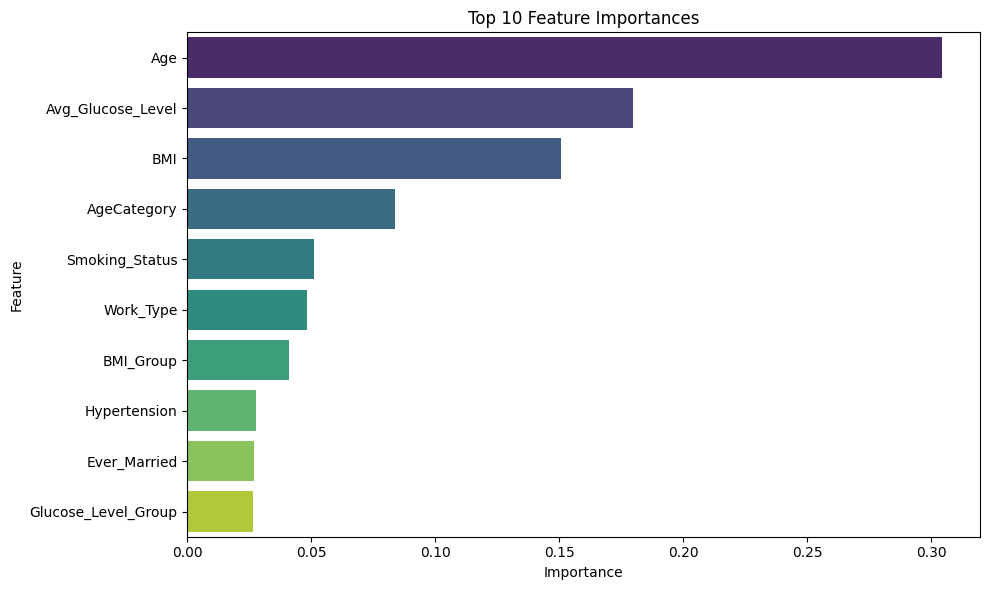

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical features using LabelEncoder
dfc_encoded = dfc.copy()
label_encoders = {}
categorical_cols = dfc_encoded.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    le = LabelEncoder()
    dfc_encoded[col] = le.fit_transform(dfc_encoded[col])
    label_encoders[col] = le

# Define features and target
X = dfc_encoded.drop('Stroke', axis=1)
y = dfc_encoded['Stroke']

#RandomOverSampler here

ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing for numeric features
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')  # Keep encoded categoricals as-is

# Final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__bootstrap': [True, False]
}

# Grid Search with 5-fold CV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model and hyperparameters
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on training and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

metrics = {
    'Metric': ['Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall', 'Train F1 Score', 'Test F1 Score'],
    'Score': [
        accuracy_score(y_train, y_train_pred),
        accuracy_score(y_test, y_test_pred),
        precision_score(y_train, y_train_pred, average='weighted'),
        precision_score(y_test, y_test_pred, average='weighted'),
        recall_score(y_train, y_train_pred, average='weighted'),
        recall_score(y_test, y_test_pred, average='weighted'),
        f1_score(y_train, y_train_pred, average='weighted'),
        f1_score(y_test, y_test_pred, average='weighted'),
    ]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# --------------------------
# Feature Importances
# --------------------------
rf_model = best_model.named_steps['classifier']

# Get feature names after transformation (numeric scaled + others)
feature_names = numeric_cols + [col for col in X.columns if col not in numeric_cols]

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop Feature Importances:")
print(feature_importance_df.head(10))

# Optional: Plot top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()


# last Test with top featuers


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import joblib

# Define top features
top_features = ['Age', 'Avg_Glucose_Level', 'BMI', 'AgeCategory', 'Smoking_Status',
                'Work_Type', 'BMI_Group', 'Hypertension', 'Ever_Married', 'Glucose_Level_Group']

# Select top features
dfc_top = dfc[top_features + ['Stroke']].copy()

# Label Encode categorical columns
label_encoders = {}
categorical_cols = dfc_top.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    le = LabelEncoder()
    dfc_top[col] = le.fit_transform(dfc_top[col])
    label_encoders[col] = le

# Split features and target
X = dfc_top.drop('Stroke', axis=1)
y = dfc_top['Stroke']

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42, stratify=y_ros)

# Identify numeric columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Column transformer: scale numeric only, pass others
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

# Final pipeline with best RF params
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        bootstrap=False,
        random_state=42
    ))
])

# Fit model
pipeline.fit(X_train, y_train)

# Predict
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Metrics
metrics = {
    'Metric': ['Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision',
               'Train Recall', 'Test Recall', 'Train F1 Score', 'Test F1 Score'],
    'Score': [
        accuracy_score(y_train, y_train_pred),
        accuracy_score(y_test, y_test_pred),
        precision_score(y_train, y_train_pred, average='weighted'),
        precision_score(y_test, y_test_pred, average='weighted'),
        recall_score(y_train, y_train_pred, average='weighted'),
        recall_score(y_test, y_test_pred, average='weighted'),
        f1_score(y_train, y_train_pred, average='weighted'),
        f1_score(y_test, y_test_pred, average='weighted'),
    ]
}
print(pd.DataFrame(metrics))

# Save model
joblib.dump(pipeline, 'final_stroke_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
print("Model saved as 'final_stroke_model.pkl'")


            Metric     Score
0   Train Accuracy  1.000000
1    Test Accuracy  0.996277
2  Train Precision  1.000000
3   Test Precision  0.996304
4     Train Recall  1.000000
5      Test Recall  0.996277
6   Train F1 Score  1.000000
7    Test F1 Score  0.996277
Model saved as 'final_stroke_model.pkl'


In [ ]:
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']